In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1) В среде Google Colab создать новый блокнот (notebook). Импортировать
необходимые для работы библиотеки и модули.


In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from PIL import Image

2) Загрузить набор данных MNIST, содержащий размеченные изображения
рукописных цифр.


In [ ]:
# загрузка датасета
(X_train, y_train), (X_test, y_test) = mnist.load_data()

3) Разбить набор данных на обучающие и тестовые данные в соотношении
60 000:10 000 элементов. При разбиении параметр random_state выбрать
равным (4k – 1), где k – номер бригады. Вывести размерности полученных
обучающих и тестовых массивов данных.
k = 10

In [ ]:
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 10000,
 train_size = 60000,
 random_state = 4*10 - 1)

In [ ]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

4) Вывести первые 4 элемента обучающих данных (изображения и метки
цифр).

In [ ]:
# вывод изображения
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i in range(4):
    axes[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.show()

5) Провести предобработку данных: привести обучающие и тестовые данные
к формату, пригодному для обучения нейронной сети. Входные данные
должны принимать значения от 0 до 1, метки цифр должны быть
закодированы по принципу «one-hot encoding». Вывести размерности
предобработанных обучающих и тестовых массивов данных.

In [ ]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)


In [ ]:
# переведем метки в one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]


6) Реализовать модель однослойной нейронной сети и обучить ее на
обучающих данных с выделением части обучающих данных в качестве
валидационных. Вывести информацию об архитектуре нейронной сети.
Вывести график функции ошибки на обучающих и валидационных данных
по эпохам.

In [ ]:
model = Sequential()
model.add(Dense(units=num_classes,input_dim=num_pixels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

In [ ]:
H1 = model.fit(X_train, y_train, batch_size=256, validation_split=0.1, epochs=150)


In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H1.history['loss'])
plt.plot(H1.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

7) Применить обученную модель к тестовым данным. Вывести значение
функции ошибки и значение метрики качества классификации на тестовых
данных.

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

8) Добавить в модель один скрытый и провести обучение и тестирование
(повторить п. 6–7) при 100, 300, 500 нейронах в скрытом слое. По метрике
качества классификации на тестовых данных выбрать наилучшее
количество нейронов в скрытом слое. В качестве функции активации
нейронов в скрытом слое использовать функцию sigmoid.

In [ ]:
model_100 = Sequential ()
model_100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model_100.add(Dense(units=num_classes, activation='softmax'))
model_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model_100.summary())

In [ ]:
H_100 = model_100.fit(X_train, y_train, batch_size=256, validation_split=0.1, epochs=150)

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_100.history['loss'])
plt.plot(H_100.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

300

In [ ]:
model_300 = Sequential ()
model_300.add(Dense(units=300,input_dim=num_pixels, activation='sigmoid'))
model_300.add(Dense(units=num_classes, activation='softmax'))
model_300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model_300.summary())

In [ ]:
H_300 = model_300.fit(X_train, y_train, batch_size=256, validation_split=0.1, epochs=150)

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_300.history['loss'])
plt.plot(H_300.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

500

In [ ]:
model_500 = Sequential ()
model_500.add(Dense(units=500,input_dim=num_pixels, activation='sigmoid'))
model_500.add(Dense(units=num_classes, activation='softmax'))
model_500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model_500.summary())

In [ ]:
H_500 = model_500.fit(X_train, y_train, batch_size=256, validation_split=0.1, epochs=150)

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_500.history['loss'])
plt.plot(H_500.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_500.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

9) Добавить в наилучшую архитектуру, определенную в п. 8, второй скрытый
слой и провести обучение и тестирование (повторить п. 6–7) при 50 и 100
нейронах во втором скрытом слое. В качестве функции активации
нейронов в скрытом слое использовать функцию sigmoid.

In [ ]:
model_100_50 = Sequential()
model_100_50.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_100_50.add(Dense(units=50, activation='sigmoid'))
model_100_50.add(Dense(units=num_classes, activation='softmax'))
model_100_50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model_100_50.summary())

In [ ]:
H_100_50 = model_100_50.fit(X_train, y_train, batch_size=256, validation_split=0.1, epochs=150)

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_100_50.history['loss'])
plt.plot(H_100_50.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_100_50.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

100 на втрором слое

In [ ]:
model_100_100 = Sequential ()
model_100_100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model_100_100.add(Dense(units=100, activation='sigmoid'))
model_100_100.add(Dense(units=num_classes, activation='softmax'))
model_100_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model_100_100.summary())

In [ ]:
H_100_100 = model_100_100.fit(X_train, y_train, batch_size=256, validation_split=0.1, epochs=150)

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_100_100.history['loss'])
plt.plot(H_100_100.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

Таблица с наилучшими архитектурами сети и вывод по ним.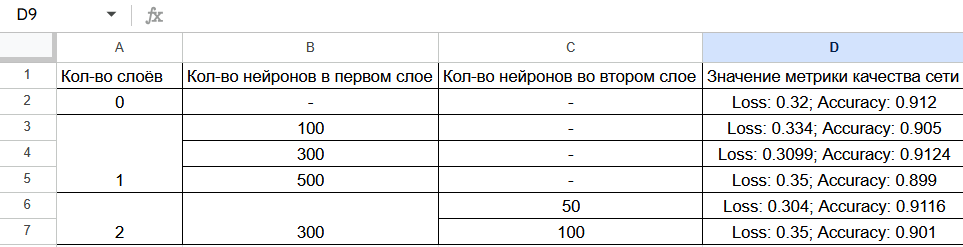

11) Сохранить  наилучшую  нейронную  сеть  на  диск.  Данную  нейронную сеть потребуется загрузить с диска в одной из следующих лабораторных работ.

In [ ]:
model_100.save("/content/drive/MyDrive/Colab Notebooks/best_model_100.keras")

12) Для  нейронной  сети  наилучшей  архитектурывывести  два  тестовых изображения, истинные метки и результат распознавания изображений.

In [ ]:
n = 333
result = model_100.predict(X_test[n:n+1])
print('NNoutput:',result)
plt.imshow(X_test[n].reshape(28,28),cmap=plt.get_cmap('gray'))
plt.show()
print('Realmark:',str(np.argmax(y_test[n])))
print('NNanswer:',str(np.argmax(result)))

In [ ]:
n = 234
result = model_100.predict(X_test[n:n+1])
print('NNoutput:',result)
plt.imshow(X_test[n].reshape(28,28),cmap=plt.get_cmap('gray'))
plt.show()
print('Realmark:',str(np.argmax(y_test[n])))
print('NNanswer:',str(np.argmax(result)))

13


In [ ]:
from keras.models import load_model

model_100=load_model('/content/drive/MyDrive/Colab Notebooks/best_model_100.keras')

In [ ]:

file_data=Image.open('/content/drive/MyDrive/Colab Notebooks/IS_lab_7.png')
file_data=file_data.convert('L')
test_img=np.array(file_data)


In [ ]:
#выводсобственногоизображения
plt.imshow(test_img,cmap=plt.get_cmap('gray'))
plt.show()
#предобработка
test_img=test_img/255
test_img=test_img.reshape(1,num_pixels)
#распознавание
result=model_100.predict(test_img)
print('I think it\'s',np.argmax(result))

In [ ]:

file_data_4=Image.open('/content/drive/MyDrive/Colab Notebooks/IS_lab_4.png')
file_data_4=file_data_4.convert('L')
test_img_4=np.array(file_data_4)

In [ ]:
#выводсобственногоизображения
plt.imshow(test_img_4,cmap=plt.get_cmap('gray'))
plt.show()
#предобработка
test_img_4=test_img_4/255
test_img_4=test_img_4.reshape(1,num_pixels)
#распознавание
result=model_100.predict(test_img_4)
print('I think it\'s',np.argmax(result))

14. Каждому  члену  бригады  создать  копию  собственного  изображения, отличающуюся от оригинала поворотом на 90 градусов в любую сторону. Сохранить  изображения.  Загрузить,  предобработать  и  подать  на  вход обученной   нейронной   сети   измененные   изображения.   Вывести изображения и результаты распознавания. Сделать выводы по результатам эксперимента.

In [ ]:
from PIL import Image
file_data=Image.open('/content/drive/MyDrive/Colab Notebooks/IS_lab_7_90.png')
file_data=file_data.convert('L')
test_img=np.array(file_data)


In [ ]:
#выводсобственногоизображения
plt.imshow(test_img,cmap=plt.get_cmap('gray'))
plt.show()
#предобработка
test_img=test_img/255
test_img=test_img.reshape(1,num_pixels)
#распознавание
result=model_100.predict(test_img)
print('Ithinkit\'s',np.argmax(result))

In [ ]:
from PIL import Image
file_data_4=Image.open('/content/drive/MyDrive/Colab Notebooks/IS_lab_4_90.png')
file_data_4=file_data_4.convert('L')
test_img_4=np.array(file_data_4)


In [ ]:
#выводсобственногоизображения
plt.imshow(test_img_4,cmap=plt.get_cmap('gray'))
plt.show()
#предобработка
test_img_4=test_img_4/255
test_img_4=test_img_4.reshape(1,num_pixels)
#распознавание
result=model_100.predict(test_img_4)
print('Ithinkit\'s',np.argmax(result))